In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad
import numpy as np

In [2]:
df = pd.read_csv('dados_avc.csv')
df.head(2)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [3]:
# Preencher valores ausentes em 'bmi' com a média
df['bmi'].replace('N/A', float('nan'), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
# Criar faixas etárias
age_bins = [0, 18, 35, 60, 100]
age_labels = ['Criança/Adolescente', 'Jovem', 'Adulto', 'Idoso']
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Criar categorias de IMC
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Abaixo do peso', 'Peso normal', 'Sobrepeso', 'Obesidade']
df['bmi'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

# Criar níveis de glicose no sangue
glucose_bins = [0, 70, 130, 200, 900]
glucose_labels = ['Baixo', 'Normal', "Alto", 'Muito alto']
df['avg_glucose_level'] = pd.cut(df['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels)

# Converter colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','avg_glucose_level', 'bmi', 'age'], drop_first=True)
df.head(15)


,id,hypertension,heart_disease,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,smoking_status_smokes,avg_glucose_level_Normal,avg_glucose_level_Alto,avg_glucose_level_Muito alto,bmi_Peso normal,bmi_Sobrepeso,bmi_Obesidade,age_Jovem,age_Adulto,age_Idoso
0,9046,0,1,1,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,51676,0,0,1,False,False,True,False,False,True,...,False,False,False,True,False,True,False,False,False,True
2,31112,0,1,1,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True
3,60182,0,0,1,False,False,True,False,True,False,...,True,False,True,False,False,False,True,False,True,False
4,1665,1,0,1,False,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,True
5,56669,0,0,1,True,False,True,False,True,False,...,False,False,True,False,False,True,False,False,False,True
6,53882,1,1,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
7,10434,0,0,1,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
8,27419,0,0,1,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
9,60491,0,0,1,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [4]:
X = df.drop(['stroke', 'id'], axis=1)
Y = df['stroke']


In [5]:
X.head(1)

,hypertension,heart_disease,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,...,smoking_status_smokes,avg_glucose_level_Normal,avg_glucose_level_Alto,avg_glucose_level_Muito alto,bmi_Peso normal,bmi_Sobrepeso,bmi_Obesidade,age_Jovem,age_Adulto,age_Idoso
0,0,1,True,False,True,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,True


In [6]:
## converting the 0 to -1
X = X.replace(0, -1)

## convering the True to 1 and False to -1
Y = Y.replace(0, -1)
X = X.replace(True, 1)
X = X.replace(False, -1)

X = X.astype('float64')
Y = Y.astype('float64')

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [8]:
def loss( parametros ):
    w, b, x, y = parametros
    est = w.T @ x + b
    mse = np_.mean( (est - y)**2)
    return mse

g = grad(loss)
x = np.array(X_train).T
y = np.array(Y_train)


In [9]:
w = np.random.randn(x.shape[0], 1)
b = 0.0
alpha = 10**-2

for n in range(15000):
    grad_ = g( (w, b, x, y) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]


In [10]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred)

In [11]:
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

## create tuples with value of w and X column name
w_tuples = []
w_lin_model = []
for i in range(len(w)):
    w_tuples.append((w[i][0], X.columns[i]))
    w_lin_model.append((model.coef_[i], X.columns[i]))

## sort the tuples
w_tuples.sort(reverse=True)
w_lin_model.sort(reverse=True)


In [12]:
print(w_tuples)

x = np.array(X_test).T
y = np.array(Y_test)

y_est = w.T @ x + b
print(f"Acurácia do modelo: {accuracy(y, y_est) * 100:.2f}%")

print(w_lin_model)

print(accuracy_score(Y_test, Y_pred))

[(0.6581130753678922, 'gender_Other'), (0.11194914061349086, 'age_Idoso'), (0.05362966068736359, 'heart_disease'), (0.04730253003859134, 'avg_glucose_level_Alto'), (0.03825916139953393, 'hypertension'), (0.03324269867718924, 'avg_glucose_level_Muito alto'), (0.02582475663946927, 'age_Adulto'), (0.025067167771654755, 'bmi_Sobrepeso'), (0.011008918450005886, 'bmi_Peso normal'), (0.009048995680966003, 'bmi_Obesidade'), (0.007246140383693966, 'Residence_type_Urban'), (0.0056312936386959415, 'avg_glucose_level_Normal'), (0.005482267179887, 'work_type_Private'), (0.0016006887222731721, 'smoking_status_smokes'), (0.0014566487137661792, 'work_type_children'), (-0.00407260067516914, 'age_Jovem'), (-0.005725769171953241, 'gender_Male'), (-0.006636451605839153, 'smoking_status_formerly smoked'), (-0.00678843813803095, 'smoking_status_never smoked'), (-0.014183774265395905, 'work_type_Self-employed'), (-0.01507263425638516, 'ever_married_Yes'), (-0.03367322816025036, 'work_type_Never_worked')]
Acu

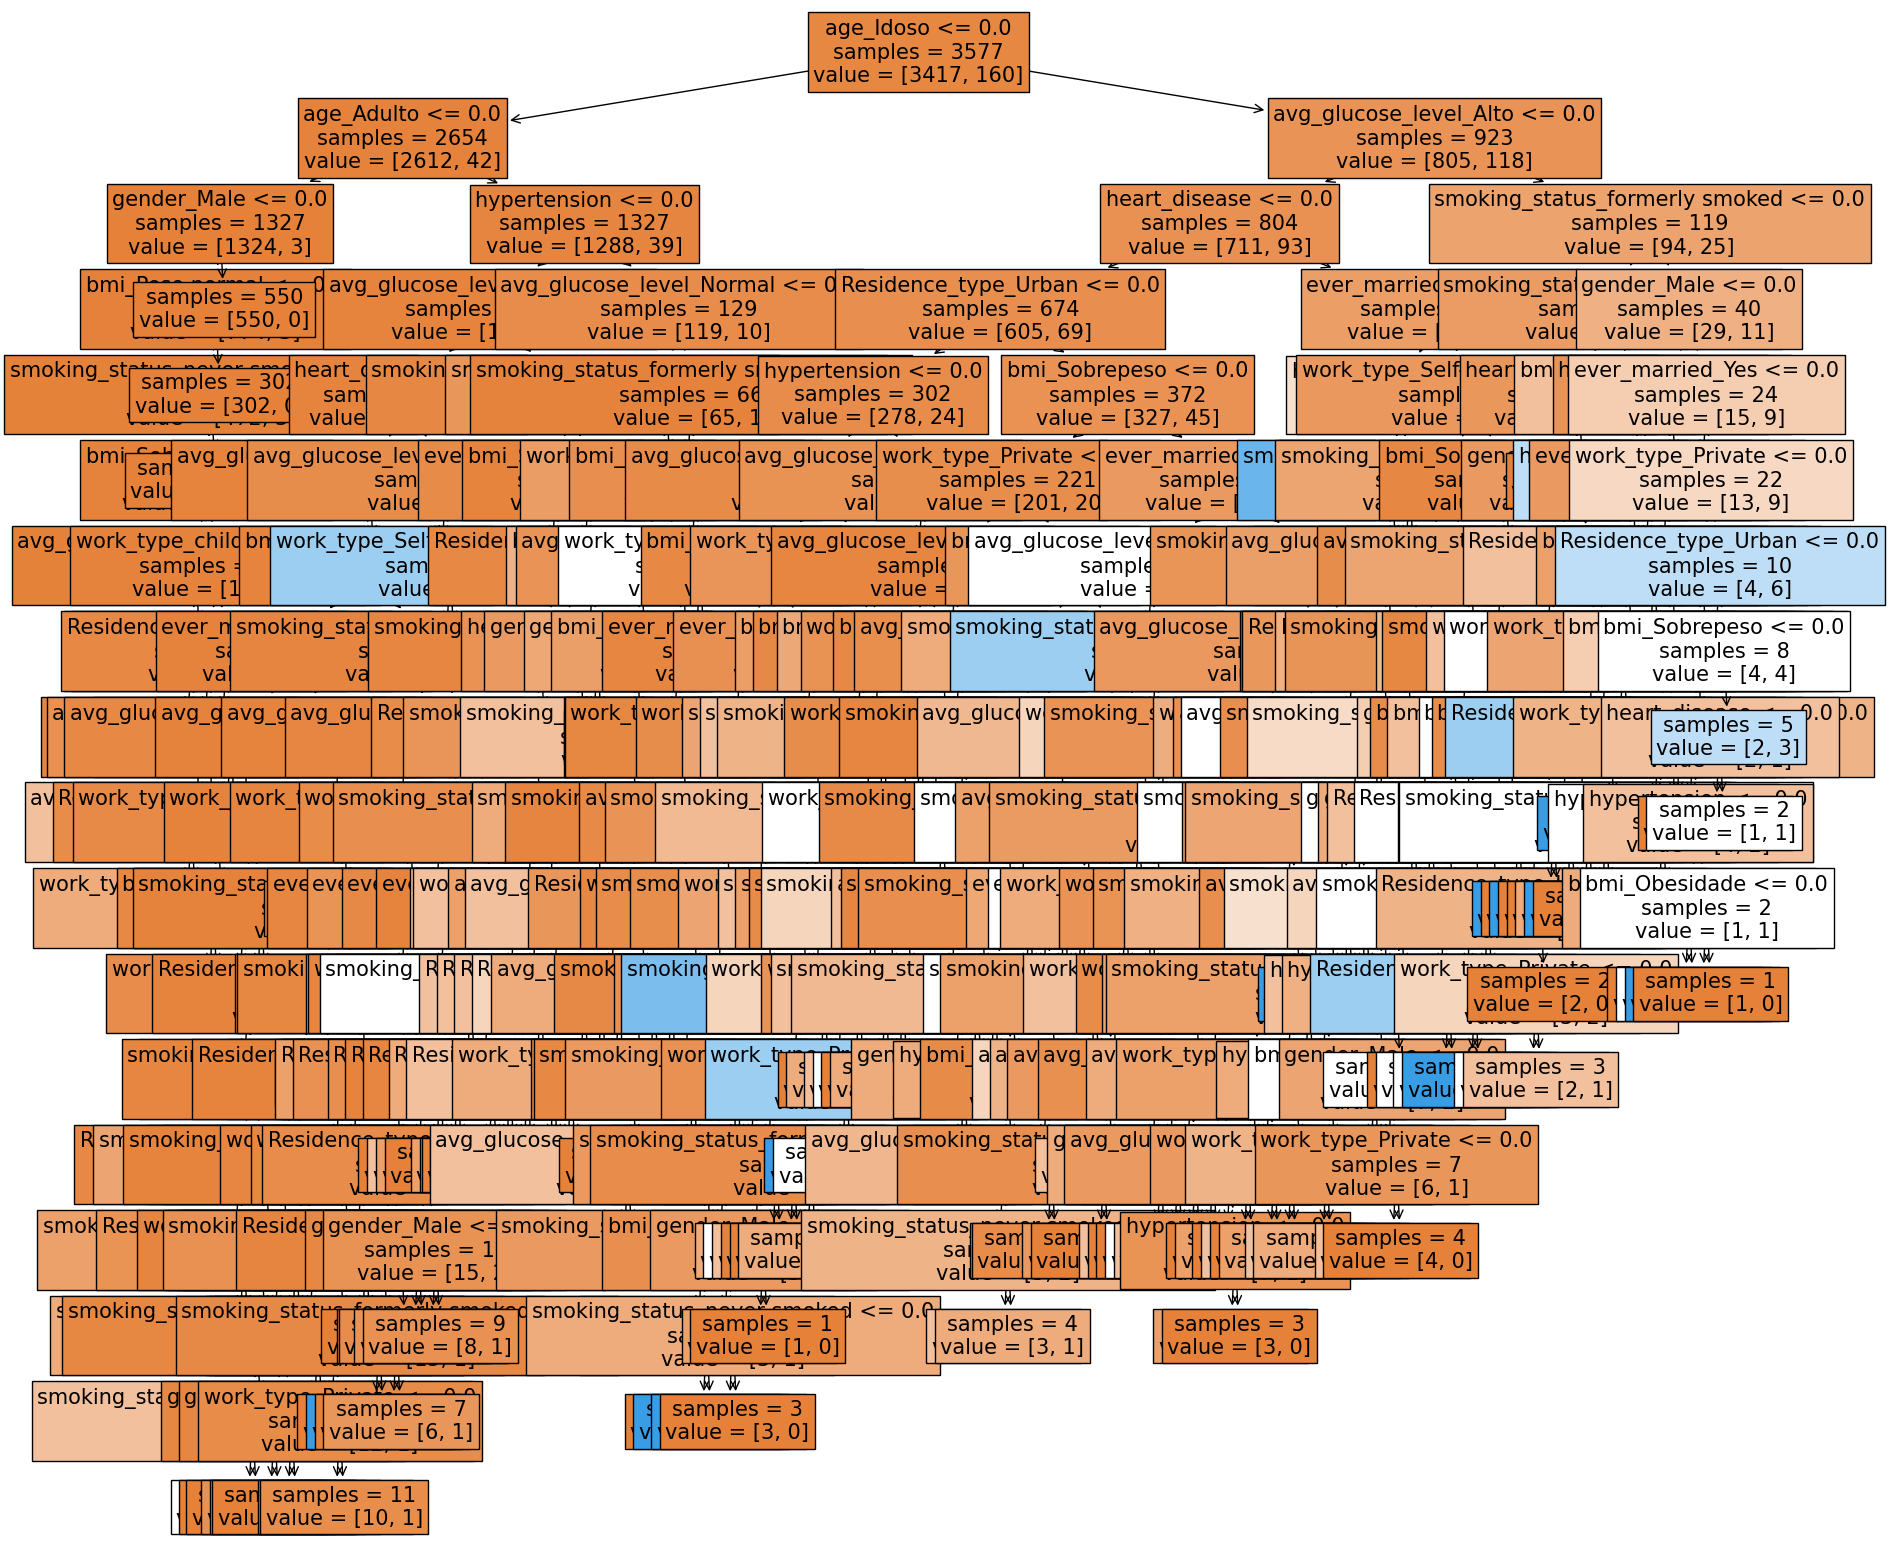

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy')

# Agora, vamos usar o método .fit() para ajustar os parâmetros da árvore:
tree.fit(X_train, Y_train)

# Podemos visualizar a árvore de decisão em uma figura!
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=X.columns, fontsize=15, 
              node_ids=False, impurity=False, filled=True)

In [14]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Acurácia do modelo de árvore de decisão:", accuracy)


Acurácia do modelo de árvore de decisão: 0.9171559034572733


In [15]:
import pandas as pd

# Obter importância das características
feature_importances = tree.feature_importances_

# Criar DataFrame com as features e sua importância
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar o DataFrame pela importância em ordem decrescente
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Exibir o DataFrame
print(feature_importance_df)


                           Feature  Importance
21                       age_Idoso    0.178128
2                      gender_Male    0.101118
9             Residence_type_Urban    0.071801
11     smoking_status_never smoked    0.069132
13        avg_glucose_level_Normal    0.061478
0                     hypertension    0.054025
10  smoking_status_formerly smoked    0.050994
6                work_type_Private    0.050832
7          work_type_Self-employed    0.048073
18                   bmi_Obesidade    0.045995
4                 ever_married_Yes    0.043632
12           smoking_status_smokes    0.041533
20                      age_Adulto    0.038941
17                   bmi_Sobrepeso    0.036033
15    avg_glucose_level_Muito alto    0.028964
16                 bmi_Peso normal    0.027613
1                    heart_disease    0.024682
14          avg_glucose_level_Alto    0.021546
19                       age_Jovem    0.004215
8               work_type_children    0.001266
3            